### Table of Contents:
#### 1. Business Understanding
#### 2. Data Understanding
#### 3. Prepare the data
#### 4. Visualise and Modelling
#### 5. Conclusion

### 1. Business Understanding

#### This data is hosted on Kaggle. This data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### We will try to answer following business questions by analysing thi dataset
1. Which jobs types of customer are likely to subscribe term deposit?
2. Are Single or Married people more likely to subsrcibe term deposit?
3. Does education has any eddect on subscription of term deposit?


In [1]:
# Lets import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### 2. Data Understanding 
#### Reading the data

In [108]:
# change the directory to read the data
path= '../Desktop/data'
os.chdir(path)


In [16]:
# Lets read the data
data= pd.read_csv('bank.csv')

### Analysing and assessing the data


In [17]:
print('data size: {}'.format(data.shape))

data size: (11162, 17)


In [18]:
data.head() #print out first 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
data.isna().sum() # check for na values and sum them up for each column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# as we can see above, dataset does not ahve any missing values

In [25]:
data.describe() # get info on numerical column

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### 3. Prepare the Data

In [27]:
""" This code separates numerical column and categorical columns in order to visualisenthem separately"""
num_cols= ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cat_cols= [col for col in data.columns if col not in num_cols]

In [28]:
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [29]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

### 4. Visualise and Modelling
#### Visualise the data for numerical and categorical features

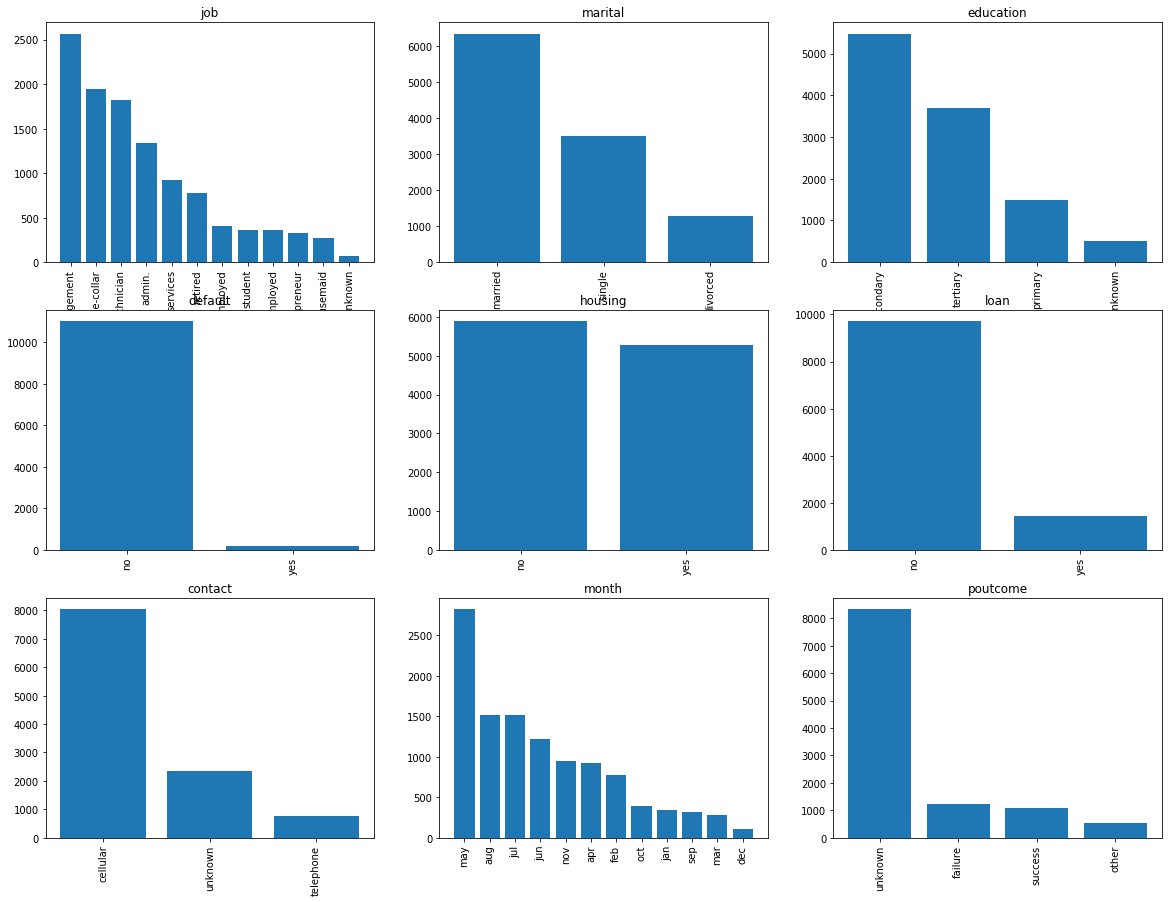

<Figure size 432x288 with 0 Axes>

In [40]:
counter=0

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))
for col in cat_cols:
    
    """
    Code to plot 9 categorical features on 3*3 grid
    
    
    """
    
    value_counts = data[col].value_counts()
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(col)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
    if counter==len(cat_cols)-1:
        break
    

plt.show()
plt.tight_layout()

In [47]:
data[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


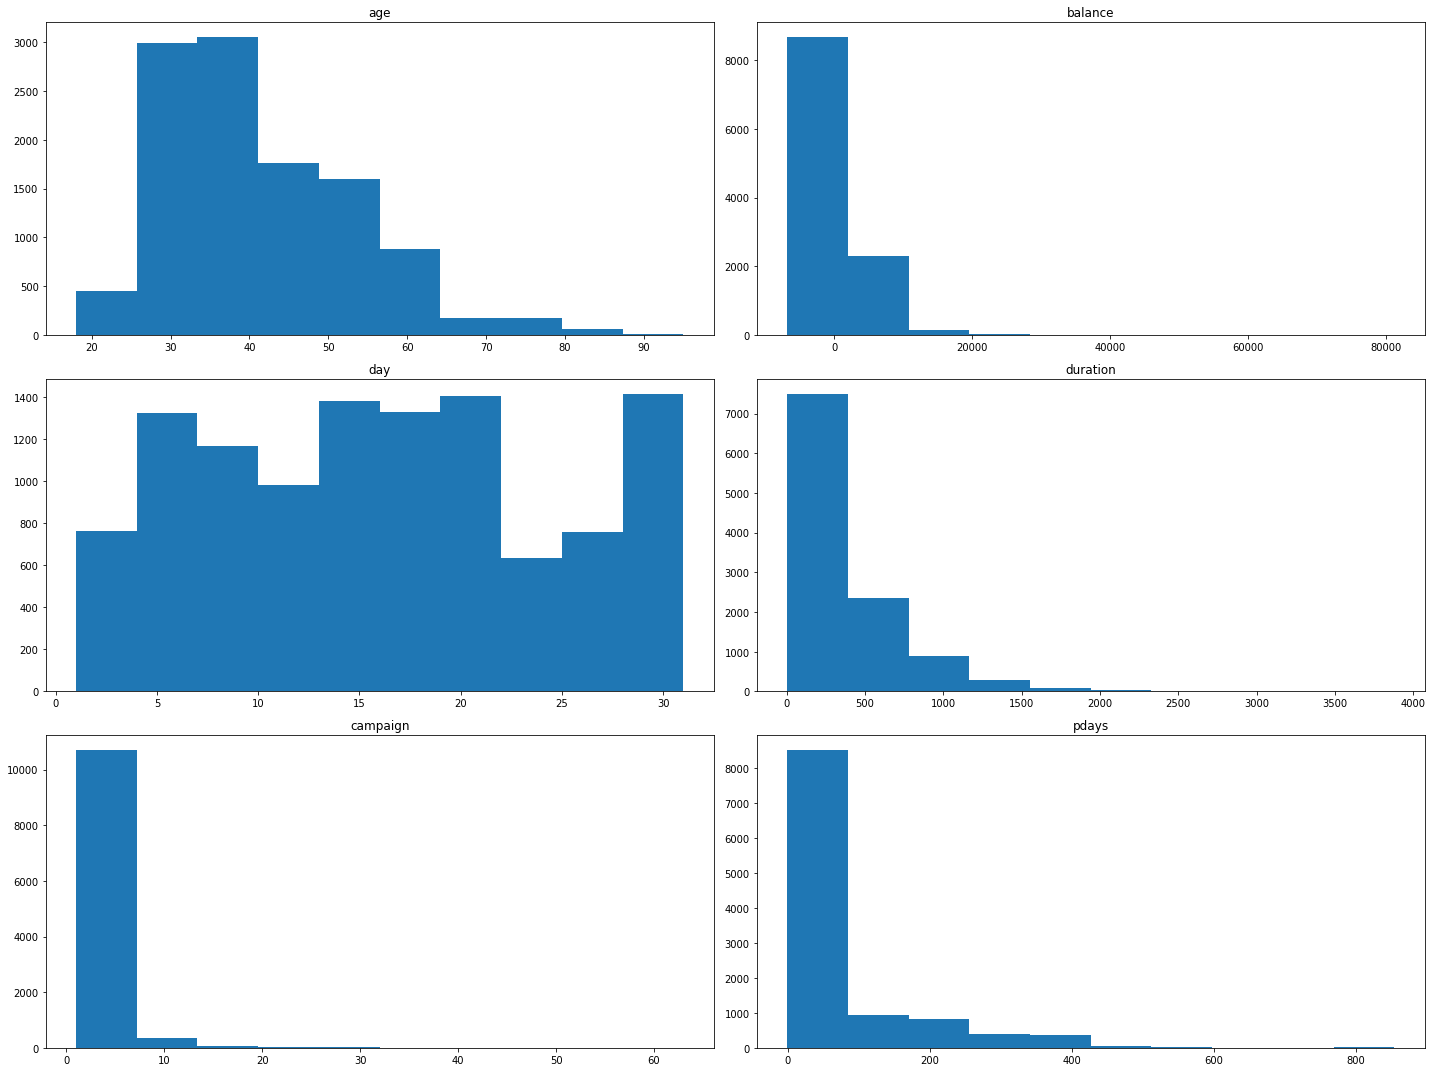

In [55]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    """
    Code to plot 6 numrical features in a loop
    
    """
    
    plt.subplot(3,2,i+1)
    plt.hist(data[col])
    plt.title(str(col))
    plt.tight_layout()
    if i==5:
        break
        



#### we can see that pdays has outlier

#### lets find and drop the rows in numerical columns if their values are outside of 3 standard devaitions

In [ ]:
""" This line of code separates and drops the data points which are outside of 3 standard deviations time the mean
    for each respective column

"""
df= data[np.abs(data[col]-data[col].mean()) <= (3*data[col].std())]

### Visualise with respect to target variable and let's answer the business questions

C:\Users\Dallas\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


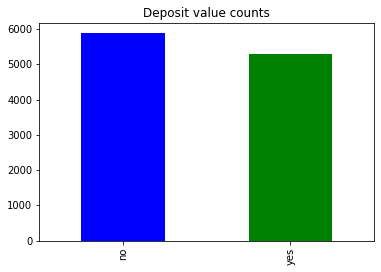

In [94]:
# lets see how deposit variable changes
value_counts = data['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts', colors=['b','g'])

### Questions:
1. Which jobs types of customer are likely to subscribe term deposit?
2. Are Single or Married people more likely to subsrcibe term deposit?
3. Does education has any eddect on subscription of term deposit?


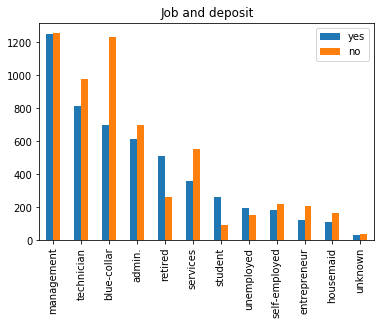

In [96]:
""" Check relation btween features: 
    deposit and job"""

job_df = pd.DataFrame()
job_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
job_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()
job_df.plot.bar(title = 'Job and deposit')

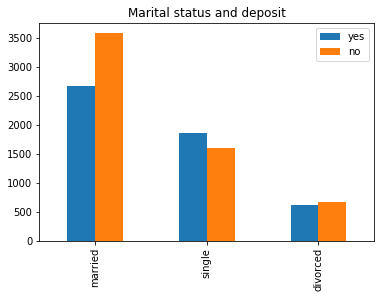

In [106]:
""" Check relation btween features: 
    deposit and marital status"""

stat_df = pd.DataFrame()
stat_df ['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
stat_df ['no'] = df[df['deposit'] == 'no']['marital'].value_counts()
stat_df .plot.bar(title = 'Marital status and deposit')

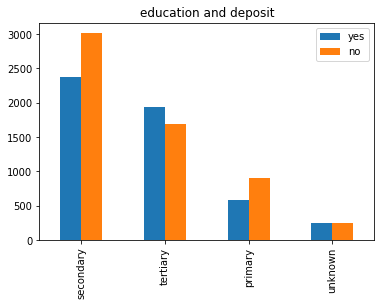

In [107]:
""" Check relation btween features: 
    deposit and education"""

stat_df = pd.DataFrame()
stat_df ['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
stat_df ['no'] = df[df['deposit'] == 'no']['education'].value_counts()
stat_df .plot.bar(title = 'education and deposit')

### 5. Conclusion
1. Proportion wise unemployed and retired people are likely to subscribe to the term deposit but on the other hand blue-caller, services, entrepreneur are less likely to sunscribe to term deposit.
2. Married people are less likely to sunscribe to term deposit on the other hand single people are more likely to subscribe to term depoit.
3. Education does seem to have effect on subscription to term deposit, people with tertiary education more likely to subscribe to term deposit on the other case with secondary education is opposit.